In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## creando los filtros de la imagen

from skimage.io import imread, imshow
from skimage.color import rgb2gray
from skimage.transform import rescale
from scipy.signal import convolve2d

## filtros de kernel
from PIL import Image, ImageFilter
from scipy import signal

# Keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.utils import np_utils
from keras.layers.core import Dropout, Activation
from keras.layers import   BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

c:\Users\jose2\anaconda3\lib\site-packages\requests\__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


In [2]:
## abriendo el dataset de digits (NMIST)

digits = datasets.load_digits()

In [3]:
## dataset
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [4]:
## target de la clasificación
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [5]:
## structura de la imagen
digits.images.shape

(1797, 8, 8)

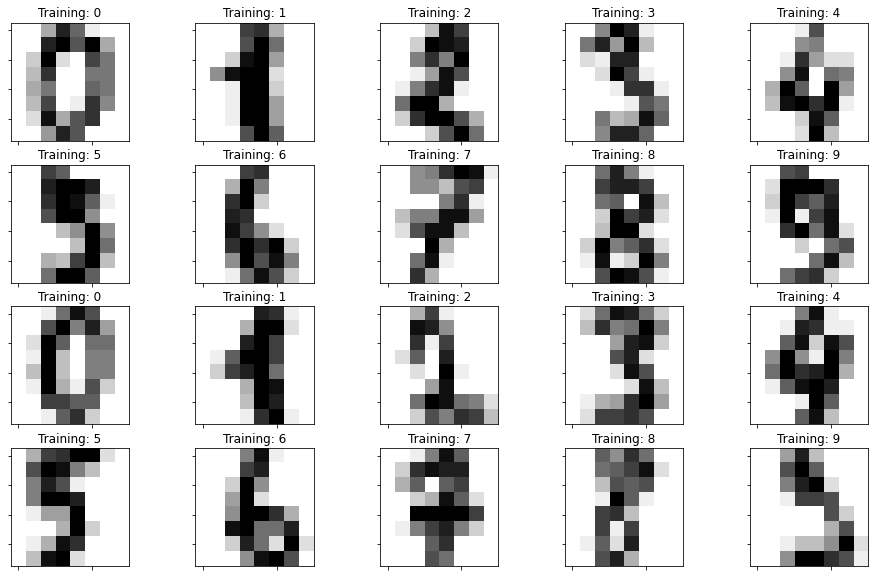

In [6]:
## visualizando el dataset
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % digits.target[i])
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")

In [7]:
## Creando el modelo de machine learning
n_samples = digits.images.shape[0]
data = digits.images.reshape((n_samples,-1))
data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [8]:
## diviendo el dataset en datos de entranamiento y testeo
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.3, shuffle=False)


In [9]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 0.001 )
model.fit(X_train,y_train)
predict = model.predict(X_test)

In [10]:
predict.shape

(540,)

In [11]:
X_test[0].reshape(8,8)

array([[ 0.,  0.,  0.,  8., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  2., 16., 10.,  0.,  0.,  0.],
       [ 0.,  0., 12., 16.,  1.,  3.,  5.,  0.],
       [ 0.,  5., 16.,  6.,  2., 16.,  9.,  0.],
       [ 0., 11., 16.,  0.,  8., 16.,  7.,  0.],
       [ 0., 10., 16., 16., 16., 11.,  1.,  0.],
       [ 0.,  1.,  7.,  9., 16.,  4.,  0.,  0.],
       [ 0.,  0.,  0., 10., 11.,  0.,  0.,  0.]])

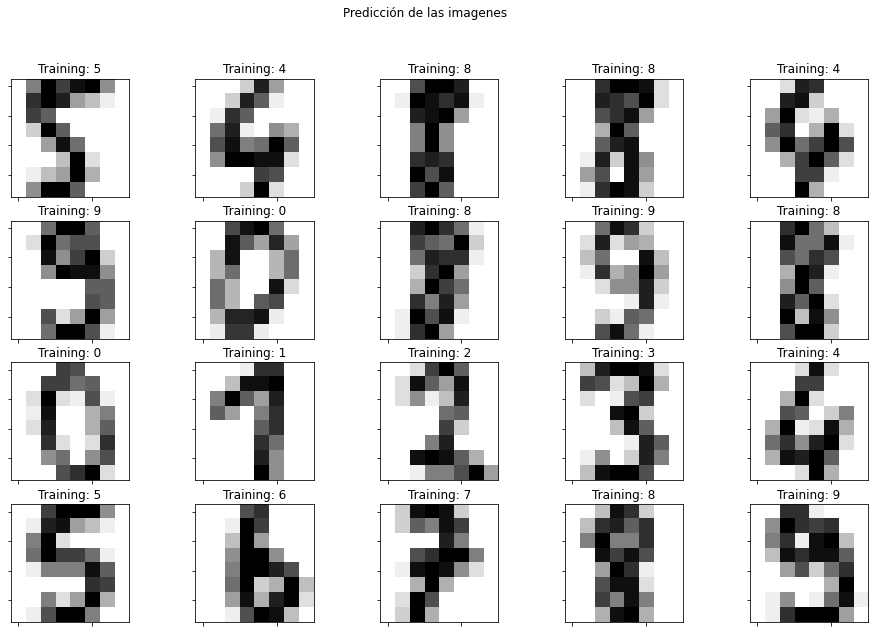

In [12]:
## visualizando de la predicción
fig, axes = plt.subplots(4,5, figsize =  (16,10))
axes = axes.flat
for i in range(20):
    axes[i].imshow(X_test[i+20].reshape(8,8), cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title("Training: %i" % predict[i+20], color = "black" if predict[i+20] == y_test[i+20] else "red")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Predicción de las imagenes")
plt.show()

In [13]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        53
           2       1.00      0.98      0.99        53
           3       0.96      0.89      0.92        53
           4       0.98      0.95      0.96        57
           5       0.95      0.98      0.96        56
           6       0.98      0.98      0.98        54
           7       1.00      1.00      1.00        54
           8       0.91      0.98      0.94        52
           9       0.96      0.96      0.96        55

    accuracy                           0.97       540
   macro avg       0.97      0.97      0.97       540
weighted avg       0.97      0.97      0.97       540




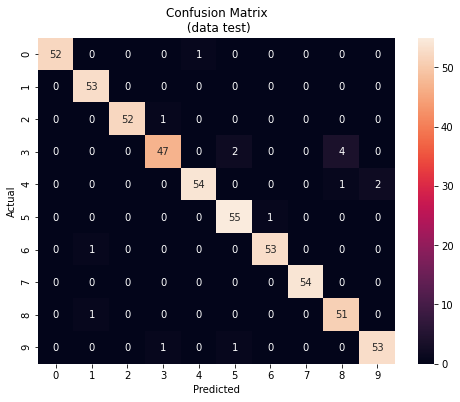

In [14]:
confusion_matrix = pd.crosstab(y_test,predict, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix, annot=True,fmt='g')
plt.title("Confusion Matrix\n (data test)")
plt.show()

### Mejorando el acurracy

In [72]:
X_train[0].reshape(8,8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [73]:
## creando los filtros de kernel para el modelo
def rgb_convolve2d(image, kernel):
    image = image.reshape(8,8)
    image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [74]:
## tipos de filtros
# Edge Detection1
kernel1 = np.array([[0, -1, 0],
                    [-1, 4, -1],
                    [0, -1, 0]])
# Edge Detection2
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])
# Bottom Sobel Filter
kernel3 = np.array([[-1, -2, -1],
                    [0, 0, 0],
                    [1, 2, 1]])
# Top Sobel Filter
kernel4 = np.array([[1, 2, 1],
                    [0, 0, 0],
                    [-1, -2, -1]])
# Left Sobel Filter
kernel5 = np.array([[1, 0, -1],
                    [2, 0, -2],
                    [1, 0, -1]])
# Right Sobel Filter
kernel6 = np.array([[-1, 0, 1],
                    [-2, 0, 2],
                    [-1, 0, 1]])
# Sharpen
kernel7 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])
# Emboss
kernel8 =  np.array([[-2, -1, 0],
                     [-1,  1, 1],
                     [ 0,  1, 2]])
# Box Blur
kernel9 = (1 / 9.0) * np.array([[1, 1, 1],
                                [1, 1, 1],
                                [1, 1, 1]])
# Gaussian Blur 3x3
kernel10 = (1 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
# Edge Enhanse
kernel11 = np.array([[0, 0, 0],
                        [-1, 1, 0],
                        [0, 0, 0]])
# Repujado
kernel12 = np.array([[-2, -1, 0],
                        [-1, 1, 1],
                        [0, 1, 2]])
# outline
kernel13 = np.array([[-1, -1, -1],
                        [-1, 8, -1],
                        [-1, -1, -1]])
# identity
kernel14 = np.array([[0, 0, 0],
                        [0, -1, 0],
                        [0, 0, 0]])

In [75]:
imagen = rgb_convolve2d(X_train[14],kernel12)
#imagen = rgb_convolve2d(imagen,kernel3)


Text(0.5, 1.0, 'filtro kernel')

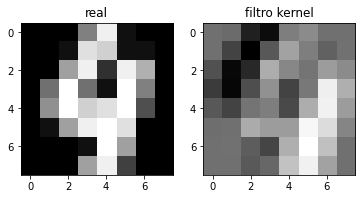

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize = (6,4))

axes[0].imshow(X_train[14].reshape(8,8), 
                  cmap='gray')
axes[0].set_title("real")
axes[1].imshow(imagen, 
                  cmap='gray')
axes[1].set_title("filtro kernel")

In [77]:
kernel = [kernel1,kernel2 ,kernel3 ,kernel4 ,kernel5, 
kernel6 ,kernel7 ,kernel8 ,kernel9 ,kernel10 ,kernel11,kernel12, kernel13,kernel14]

Text(0.5, 0.98, 'Tipos de kernel')

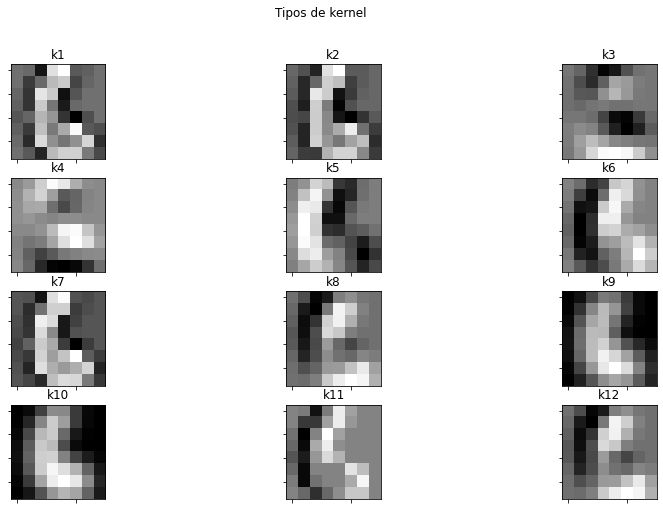

In [78]:
fig, axes = plt.subplots(nrows=4,ncols=3,figsize = (14,8))
axes = axes.flat
for i in range(12):
    axes[i].imshow(rgb_convolve2d(X_train[26],kernel[i]), 
                    cmap='gray')
    axes[i].set_title(f"k{i+1}")
    axes[i].set_xticklabels("")
    axes[i].set_yticklabels("")
fig.suptitle("Tipos de kernel")

In [79]:
## creando los filtros de kernel para el modelo general

def rgb_kernel_convolve2d(image, kernel):
    image_k = []
    for i in range(image.shape[0]):
        image_transform = image[i].reshape(8,8)
        image_k.append(convolve2d(image_transform, kernel, 'same', boundary = 'fill',
                            fillvalue = 0))
    image_k = np.array(image_k)
    n_samples = image.shape[0]
    image_k= image_k.reshape((n_samples,-1))
    return image_k

In [80]:
## aplicando los filtros de kernel
X_train2 = rgb_kernel_convolve2d(X_train, kernel14)

X_test2 = rgb_kernel_convolve2d(X_test, kernel14)


In [81]:
#X_train2 = filters.unsharp_mask(X_train, radius = 5, amount = 1)
#X_test2 = filters.unsharp_mask(X_test, radius = 5, amount = 1)

In [82]:
## creando el modelo de machine learning

model = svm.SVC(gamma= 'scale',class_weight="balanced", C = 100 )
model.fit(X_train2,y_train)
predict = model.predict(X_test2)

In [83]:
print(
    f"Classification report for classifier {model}:\n"
    f"{metrics.classification_report(y_test, predict)}\n"
)

Classification report for classifier SVC(C=100, class_weight='balanced'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       1.00      0.98      0.99        86
           3       0.98      0.90      0.94        91
           4       0.99      0.96      0.97        92
           5       0.94      0.97      0.95        91
           6       0.99      0.99      0.99        91
           7       0.97      0.99      0.98        89
           8       0.92      0.98      0.95        88
           9       0.93      0.97      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899




In [84]:
from skimage.io import imread, imshow

c:\Users\jose2\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


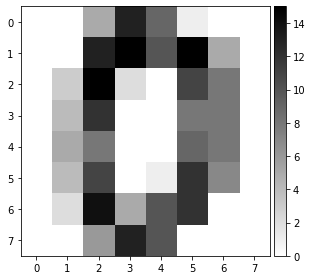

In [85]:
imshow(digits.images[0],  cmap=plt.cm.gray_r)

In [86]:
from skimage.filters import gaussian
from skimage import filters 

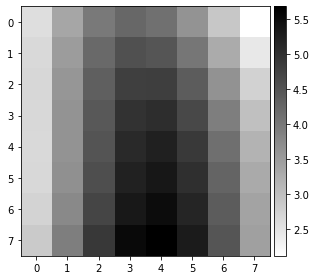

In [87]:
imshow(gaussian(digits.images[5], sigma=3),  cmap=plt.cm.gray_r)

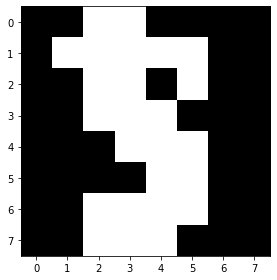

In [88]:
imshow(filters.unsharp_mask(digits.images[120], radius = 10, amount = 1),  cmap=plt.cm.gray)

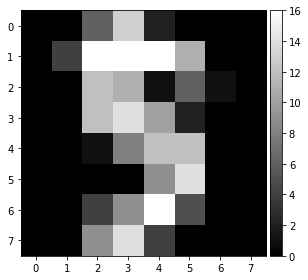

In [89]:
imshow(digits.images[120],  cmap=plt.cm.gray)

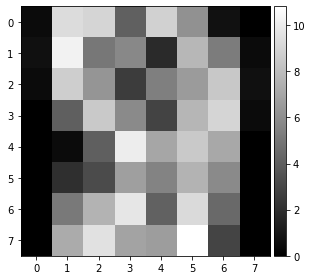

In [90]:
imshow(filters.sobel(digits.images[125]),  cmap=plt.cm.gray)

In [91]:
filters.unsharp_mask(X_train, radius = 5, amount = 1)

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [92]:
## aplicando filtros de kernel

imgpath = "Foto.jpg"

img = Image.open(imgpath)

In [93]:
img = img.convert('L')

In [94]:
imgmatrix = np.asarray(img, dtype=np.uint8)
imgmatrix.shape

(288, 240)

In [95]:
kernelValues = [-2,-1,0,-1,1,1,0,1,2] 

kernel = ImageFilter.Kernel((3,3),kernelValues)

In [96]:
im2 = img.filter(kernel)

In [97]:
type(im2)

PIL.Image.Image

In [98]:
X_train[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

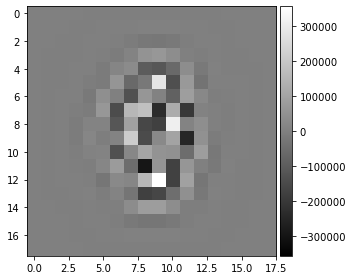

In [99]:
probando = signal.convolve(X_train[124].reshape(8,8), kernel7)
probando = signal.convolve(probando, kernel13)
probando = signal.convolve(probando, kernel13)
probando = signal.convolve(probando, kernel2)
probando = signal.convolve(probando, kernel13)

imshow(probando, cmap=plt.cm.gray)

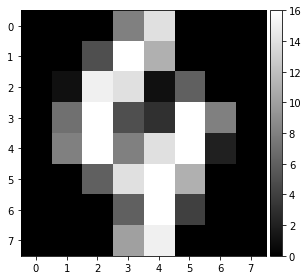

In [100]:
imshow(X_train[124].reshape(8,8), cmap=plt.cm.gray)

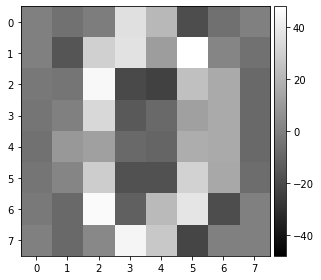

In [101]:
imshow(rgb_convolve2d(X_train[0],kernel7), cmap=plt.cm.gray)

In [102]:
signal.convolve(X_train[0].reshape(8,8), kernel2).shape

(10, 10)

In [103]:
rgb_convolve2d(X_train[0],kernel2).shape

(8, 8)

In [104]:
#a = imshow(X_train[124].reshape(8,8), cmap=plt.cm.gray)
#plt.imsave('test.png', a)

In [105]:
## APLICANDO KERAS ( Redes Neuronales CONVOLUCIONALES)
##  one-hot encoding y

n_class = pd.unique(y_train).shape[0]
Y_train = np_utils.to_categorical(y_train, n_class)
Y_test = np_utils.to_categorical(y_test, n_class)


In [106]:
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
y_train.shape,Y_train.shape

((898,), (898, 10))

In [108]:
## inicualizando el modelo
model = Sequential()

## creando la primera capa 

model.add(Dense(units= 25,input_shape = (64,)))
# Función de activación
model.add(Activation('relu'))
# realizando un dropout
model.add(Dropout(0.2))

## Creando segunda capa

model.add(Dense(units= 25))
# Función de activación
model.add(Activation('relu'))
# realizando un dropout
model.add(Dropout(0.2))


# Creando la capa de salida

model.add(Dense(units= 10,input_shape = (64,)))
model.add(Activation('softmax'))

In [109]:
model.compile(optimizer= 'adam', 
loss = "categorical_crossentropy", metrics= ["accuracy"])

In [110]:
X_train.shape

(898, 64)

In [111]:
result= model.fit(X_train, Y_train,
        # muestras para la actualización de los pesos
          batch_size=10, 
        # n° de veces que se va a iterar en el conjunto de entrenamiento
          epochs=45,
          verbose=2,
          validation_data=(X_test, Y_test))

Epoch 1/45
90/90 - 3s - loss: 3.7408 - accuracy: 0.1971 - val_loss: 1.6804 - val_accuracy: 0.4516 - 3s/epoch - 33ms/step
Epoch 2/45
90/90 - 0s - loss: 2.0698 - accuracy: 0.3140 - val_loss: 1.3823 - val_accuracy: 0.5339 - 495ms/epoch - 6ms/step
Epoch 3/45
90/90 - 0s - loss: 1.6710 - accuracy: 0.4421 - val_loss: 1.0776 - val_accuracy: 0.7008 - 495ms/epoch - 5ms/step
Epoch 4/45
90/90 - 0s - loss: 1.4469 - accuracy: 0.5089 - val_loss: 0.9015 - val_accuracy: 0.7442 - 495ms/epoch - 5ms/step
Epoch 5/45
90/90 - 1s - loss: 1.1636 - accuracy: 0.5891 - val_loss: 0.7586 - val_accuracy: 0.7898 - 501ms/epoch - 6ms/step
Epoch 6/45
90/90 - 1s - loss: 1.1051 - accuracy: 0.6225 - val_loss: 0.6549 - val_accuracy: 0.8109 - 539ms/epoch - 6ms/step
Epoch 7/45
90/90 - 1s - loss: 0.9579 - accuracy: 0.6849 - val_loss: 0.5941 - val_accuracy: 0.8432 - 604ms/epoch - 7ms/step
Epoch 8/45
90/90 - 0s - loss: 0.8929 - accuracy: 0.6815 - val_loss: 0.5478 - val_accuracy: 0.8476 - 388ms/epoch - 4ms/step
Epoch 9/45
90/90 -

In [112]:
score = result.model.evaluate(X_test, Y_test, verbose = 2)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

29/29 - 0s - loss: 0.2915 - accuracy: 0.9255 - 135ms/epoch - 5ms/step
Test loss: 0.29154661297798157
Test accuracy: 0.9254727363586426


In [113]:
X_test.shape

(899, 64)

In [114]:
# Again, do some formatting
# Except we do not flatten each image into a 784-length vector because we want to perform convolutions first

X_train3 = X_train.reshape(898, 8, 8, 1) 
X_test3 = X_test.reshape(899, 8, 8, 1)

X_train3 = X_train3.astype('float32')         
X_test3 = X_test3.astype('float32')

X_train3 /= 255                              # normalize each value for each pixel for the entire vector for each input
X_test3 /= 255

print("Training matrix shape", X_train3.shape)
print("Testing matrix shape", X_test3.shape)

Training matrix shape (898, 8, 8, 1)
Testing matrix shape (899, 8, 8, 1)


In [165]:
model = Sequential()                                 # Linear stacking of layers

# Convolution Layer 1
model.add(Conv2D(32, (3, 3), input_shape=(8,8,1))) # 32 different 3x3 kernels -- so 32 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
convLayer01 = Activation('relu')                     # activation
model.add(convLayer01)


# Convolution Layer 2
model.add(Conv2D(64, (3, 3)))                        # 64 different 3x3 kernels -- so 64 feature maps
model.add(BatchNormalization(axis=-1))               # normalize each feature map before activation
model.add(Activation('relu'))                        # activation
convLayer04 = MaxPooling2D(pool_size=(2,2))          # Pool the max values over a 2x2 kernel
model.add(convLayer04)
model.add(Flatten())                               # Flatten final 4x4x64 output matrix into a 1024-length vector

# Fully Connected Layer 3
model.add(Dropout(0.2))  
model.add(Dense(50))                                # 50 FCN nodes
model.add(BatchNormalization())                      # normalization
model.add(Activation('relu'))   

# Fully Connected Layer 4
model.add(Dense(units= 25))
model.add(BatchNormalization()) 
model.add(Activation('relu'))


# Fully Connected Layer 5                      
model.add(Dropout(0.2))                              # 20% dropout of randomly selected nodes
model.add(Dense(10))                                 # final 10 FCN nodes
model.add(Activation('softmax'))  

In [159]:
model.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_70 (Conv2D)          (None, 6, 6, 32)          320       
                                                                 
 batch_normalization_64 (Bat  (None, 6, 6, 32)         128       
 chNormalization)                                                
                                                                 
 activation_75 (Activation)  (None, 6, 6, 32)          0         
                                                                 
 conv2d_71 (Conv2D)          (None, 4, 4, 64)          18496     
                                                                 
 batch_normalization_65 (Bat  (None, 4, 4, 64)         256       
 chNormalization)                                                
                                                                 
 activation_76 (Activation)  (None, 4, 4, 64)        

In [166]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [167]:
gen = ImageDataGenerator(rotation_range=8, width_shift_range=0.08, shear_range=0.3,
                         height_shift_range=0.08, zoom_range=0.08)

test_gen = ImageDataGenerator()

In [168]:
train_generator = gen.flow(X_train3, Y_train, batch_size=32)
test_generator = test_gen.flow(X_test3, Y_test, batch_size=32)

In [169]:

model.fit_generator(train_generator, steps_per_epoch=898//32, epochs=100, verbose=1, 
                    validation_data= test_generator, validation_steps=899//32)

<ipython-input-169-bed1ef5b2be9>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_generator, steps_per_epoch=898//32, epochs=100, verbose=1,


Epoch 1/100
28/28 [==============================] - 9s 149ms/step - loss: 2.0075 - accuracy: 0.2968 - val_loss: 2.3113 - val_accuracy: 0.1027
Epoch 2/100
28/28 [==============================] - 1s 45ms/step - loss: 1.5244 - accuracy: 0.5081 - val_loss: 2.3404 - val_accuracy: 0.1016
Epoch 3/100
28/28 [==============================] - 1s 37ms/step - loss: 1.3261 - accuracy: 0.5993 - val_loss: 2.3741 - val_accuracy: 0.1027
Epoch 4/100
28/28 [==============================] - 1s 37ms/step - loss: 1.1807 - accuracy: 0.6755 - val_loss: 2.4012 - val_accuracy: 0.1027
Epoch 5/100
28/28 [==============================] - 1s 43ms/step - loss: 1.0406 - accuracy: 0.7217 - val_loss: 2.4290 - val_accuracy: 0.1786
Epoch 6/100
28/28 [==============================] - 1s 41ms/step - loss: 0.9101 - accuracy: 0.7818 - val_loss: 2.4545 - val_accuracy: 0.1975
Epoch 7/100
28/28 [==============================] - 1s 33ms/step - loss: 0.9020 - accuracy: 0.7714 - val_loss: 2.4722 - val_accuracy: 0.1473
Epoch

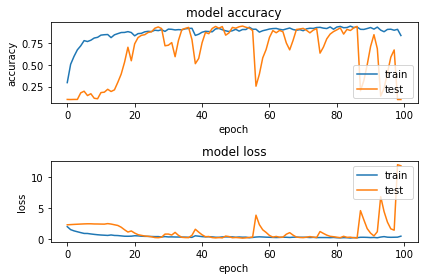

In [170]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

In [ ]:
model.history.history

{'loss': [1.874001145362854,
  1.213083028793335,
  0.9467852711677551,
  0.7735491394996643,
  0.6798977851867676,
  0.5661628246307373,
  0.5276862382888794,
  0.4640578627586365,
  0.39051568508148193,
  0.3875615894794464,
  0.3751507103443146,
  0.2855387330055237,
  0.26388823986053467,
  0.29747992753982544,
  0.2374298870563507,
  0.21192479133605957,
  0.2478567510843277,
  0.22702014446258545,
  0.22254063189029694,
  0.22138464450836182,
  0.21894951164722443,
  0.16254307329654694,
  0.16091153025627136,
  0.16978661715984344,
  0.18497447669506073,
  0.1884031593799591,
  0.15080532431602478,
  0.16174469888210297,
  0.1622086465358734,
  0.16024412214756012,
  0.12616579234600067,
  0.12559401988983154,
  0.17369113862514496,
  0.11325398087501526,
  0.1227632462978363],
 'accuracy': [0.3758542239665985,
  0.6537585258483887,
  0.7289294004440308,
  0.785876989364624,
  0.8041002154350281,
  0.8610478639602661,
  0.8576309680938721,
  0.8758541941642761,
  0.8952164053916

In [ ]:
score = model.evaluate(X_test3, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

29/29 [==============================] - 2s 15ms/step - loss: 12.8429 - accuracy: 0.1012
Test score: 12.84286117553711
Test accuracy: 0.10122358053922653


In [ ]:
X_test3.shape

(899, 8, 8, 1)